# PlotSpec MVP demo (experimental)

This notebook demonstrates the new backend-agnostic PlotSpec (ADR-007) using the matplotlib adapter.
It mirrors part of the existing regression bar plot using synthetic inputs to keep it self-contained.

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import numpy as np
from calibrated_explanations.viz import build_regression_bars_spec, matplotlib_adapter

# If matplotlib is missing, install the 'viz' extra: pip install "calibrated_explanations[viz]"

## Create synthetic inputs
We mimic the inputs used by the current regression plotting path: a prediction with an interval
and feature weights (optionally with uncertainty intervals).

In [18]:
rng = np.random.default_rng(0)
n_features = 8

predict = {
    'predict': float(rng.uniform(0.3, 0.7)),
    'low': float(rng.uniform(0.1, 0.3)),
    'high': float(rng.uniform(0.7, 0.9)),
}

# Intervals centered at per-feature prediction: low/high = predict ± width/2
pred_center = rng.normal(0.0, 0.25, size=n_features)
width = np.abs(rng.normal(0.2, 0.1, size=n_features))

fw_low = pred_center - width / 2
fw_high = pred_center + width / 2

feature_weights = {
    'predict': pred_center,
    'low': fw_low,
    'high': fw_high,
}
features_to_plot = list(range(n_features))
column_names = [f'f{i}' for i in range(n_features)]
instance = rng.normal(size=n_features)
y_minmax = (0.0, 1.0)
interval = True

spec = build_regression_bars_spec(
    title='PlotSpec MVP (Regression bars)',
    predict=predict,
    feature_weights=feature_weights,
    features_to_plot=features_to_plot,
    column_names=column_names,
    instance=instance,
    y_minmax=y_minmax,
    interval=interval,
)
spec

PlotSpec(title='PlotSpec MVP (Regression bars)', figure_size=None, header=IntervalHeaderSpec(pred=0.5547846749285816, low=0.15395734275277406, high=0.7081947047872389, xlim=(0.0, 1.0), xlabel='Prediction interval', ylabel='Median prediction'), body=BarHPanelSpec(bars=[BarItem(label='f0', value=0.026225029288259927, interval_low=-0.07584126967910226, interval_high=0.12829132825562212, color_role='regression', instance_value=1.0425133694426776), BarItem(label='f1', value=-0.13391734329027774, interval_low=-0.15016888202221945, interval_high=-0.11766580455833603, color_role='regression', instance_value=-0.12853466294403426), BarItem(label='f2', value=0.09039876372737118, interval_low=0.0013383469239984652, interval_high=0.1794591805307439, color_role='regression', instance_value=1.3664634705496859), BarItem(label='f3', value=0.3260000112825343, interval_low=0.2882955586451876, interval_high=0.36370446391988104, color_role='regression', instance_value=-0.6651946734866135), BarItem(label='f

## Render via matplotlib adapter
Use the adapter to render the PlotSpec.
If you want to save the figure instead, pass `save_path=...` and set `show=False`.

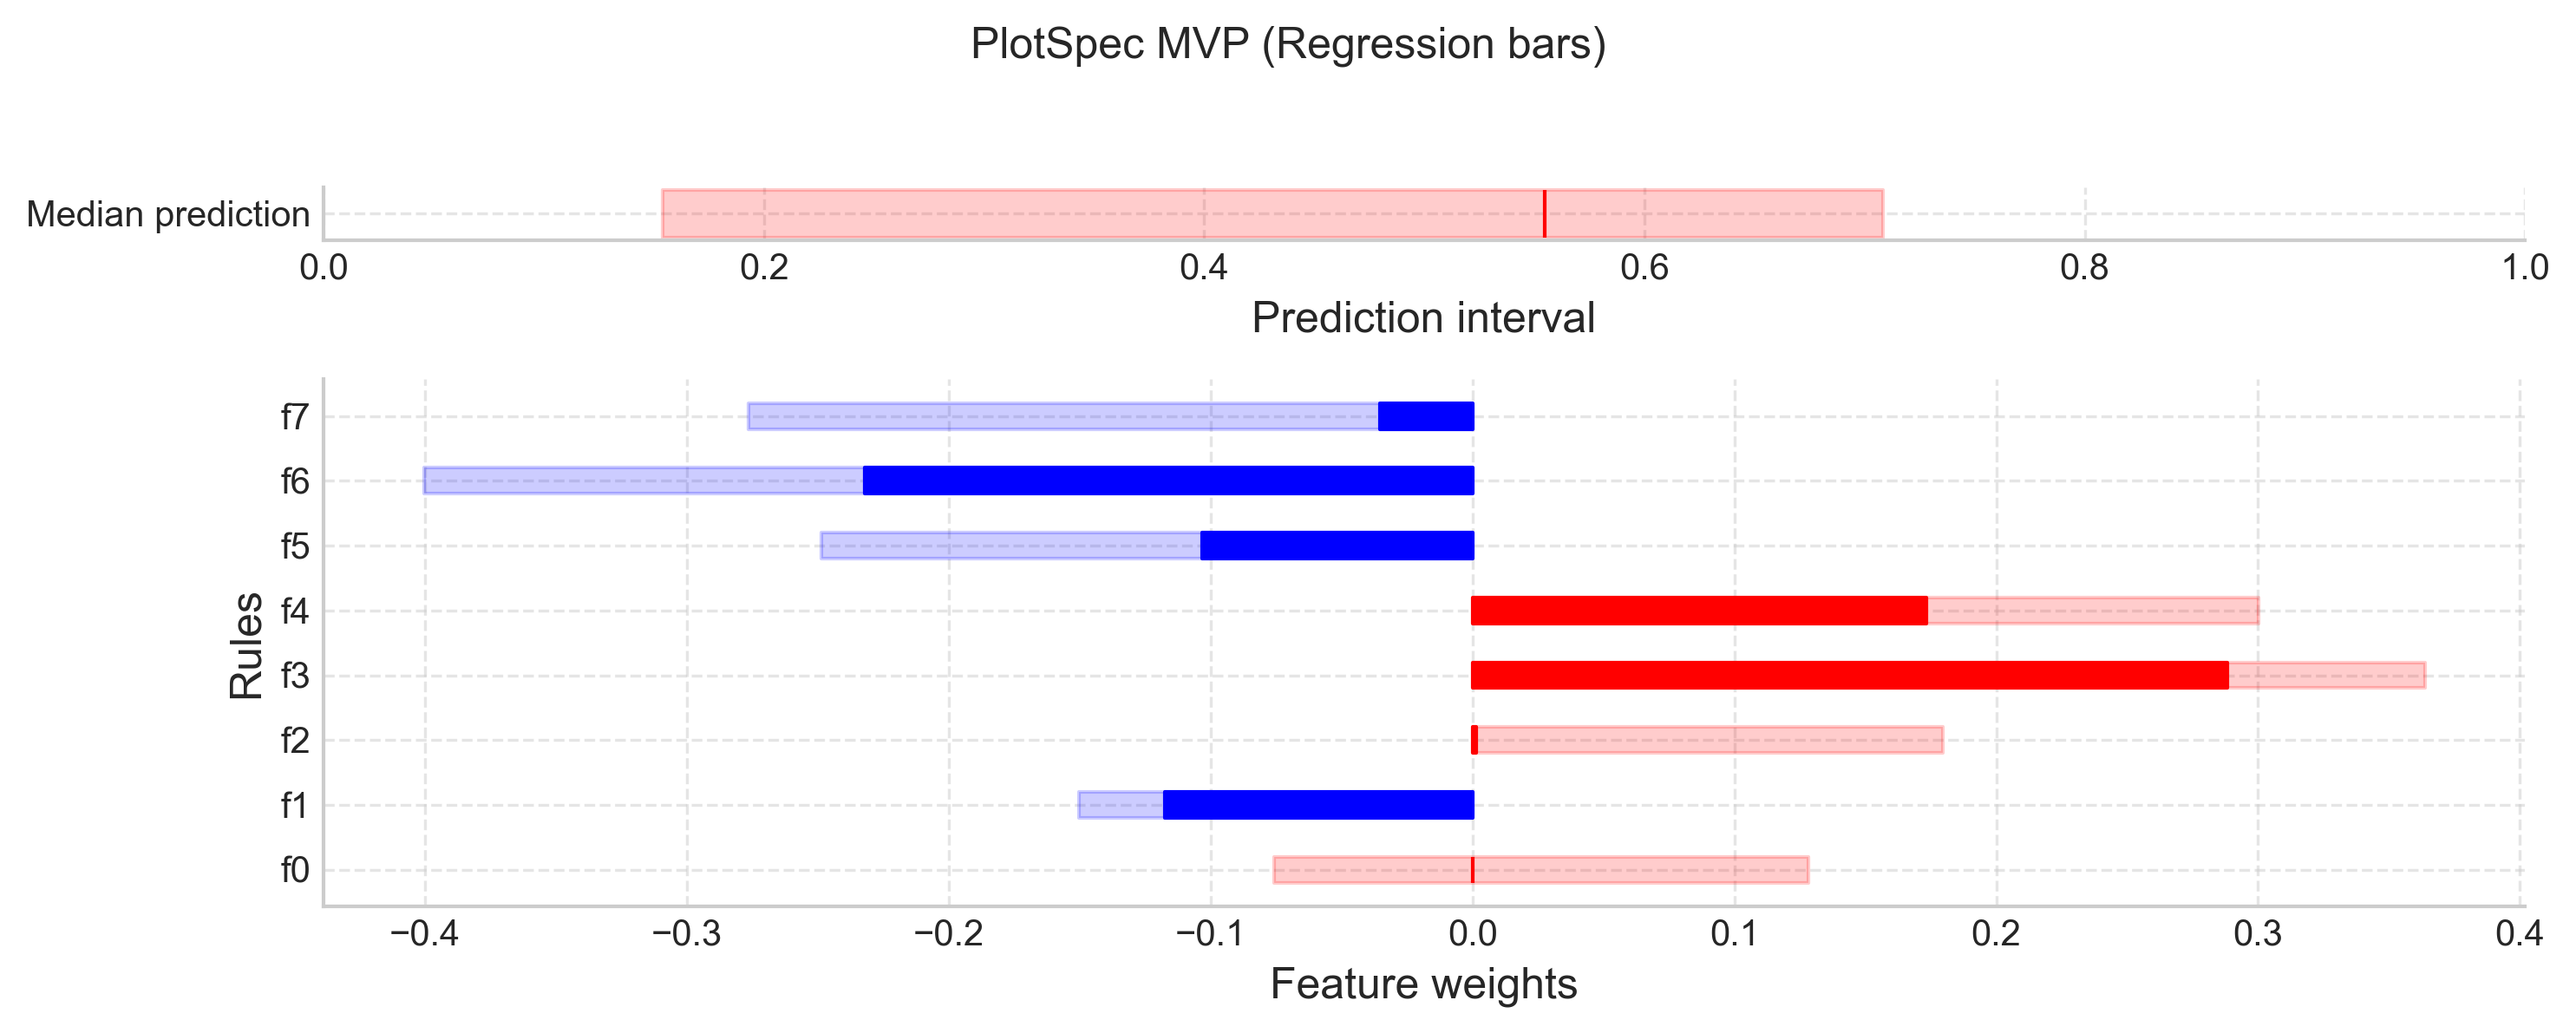

In [19]:
# This will display inline in the notebook if matplotlib is available.
matplotlib_adapter.render(spec, show=True)

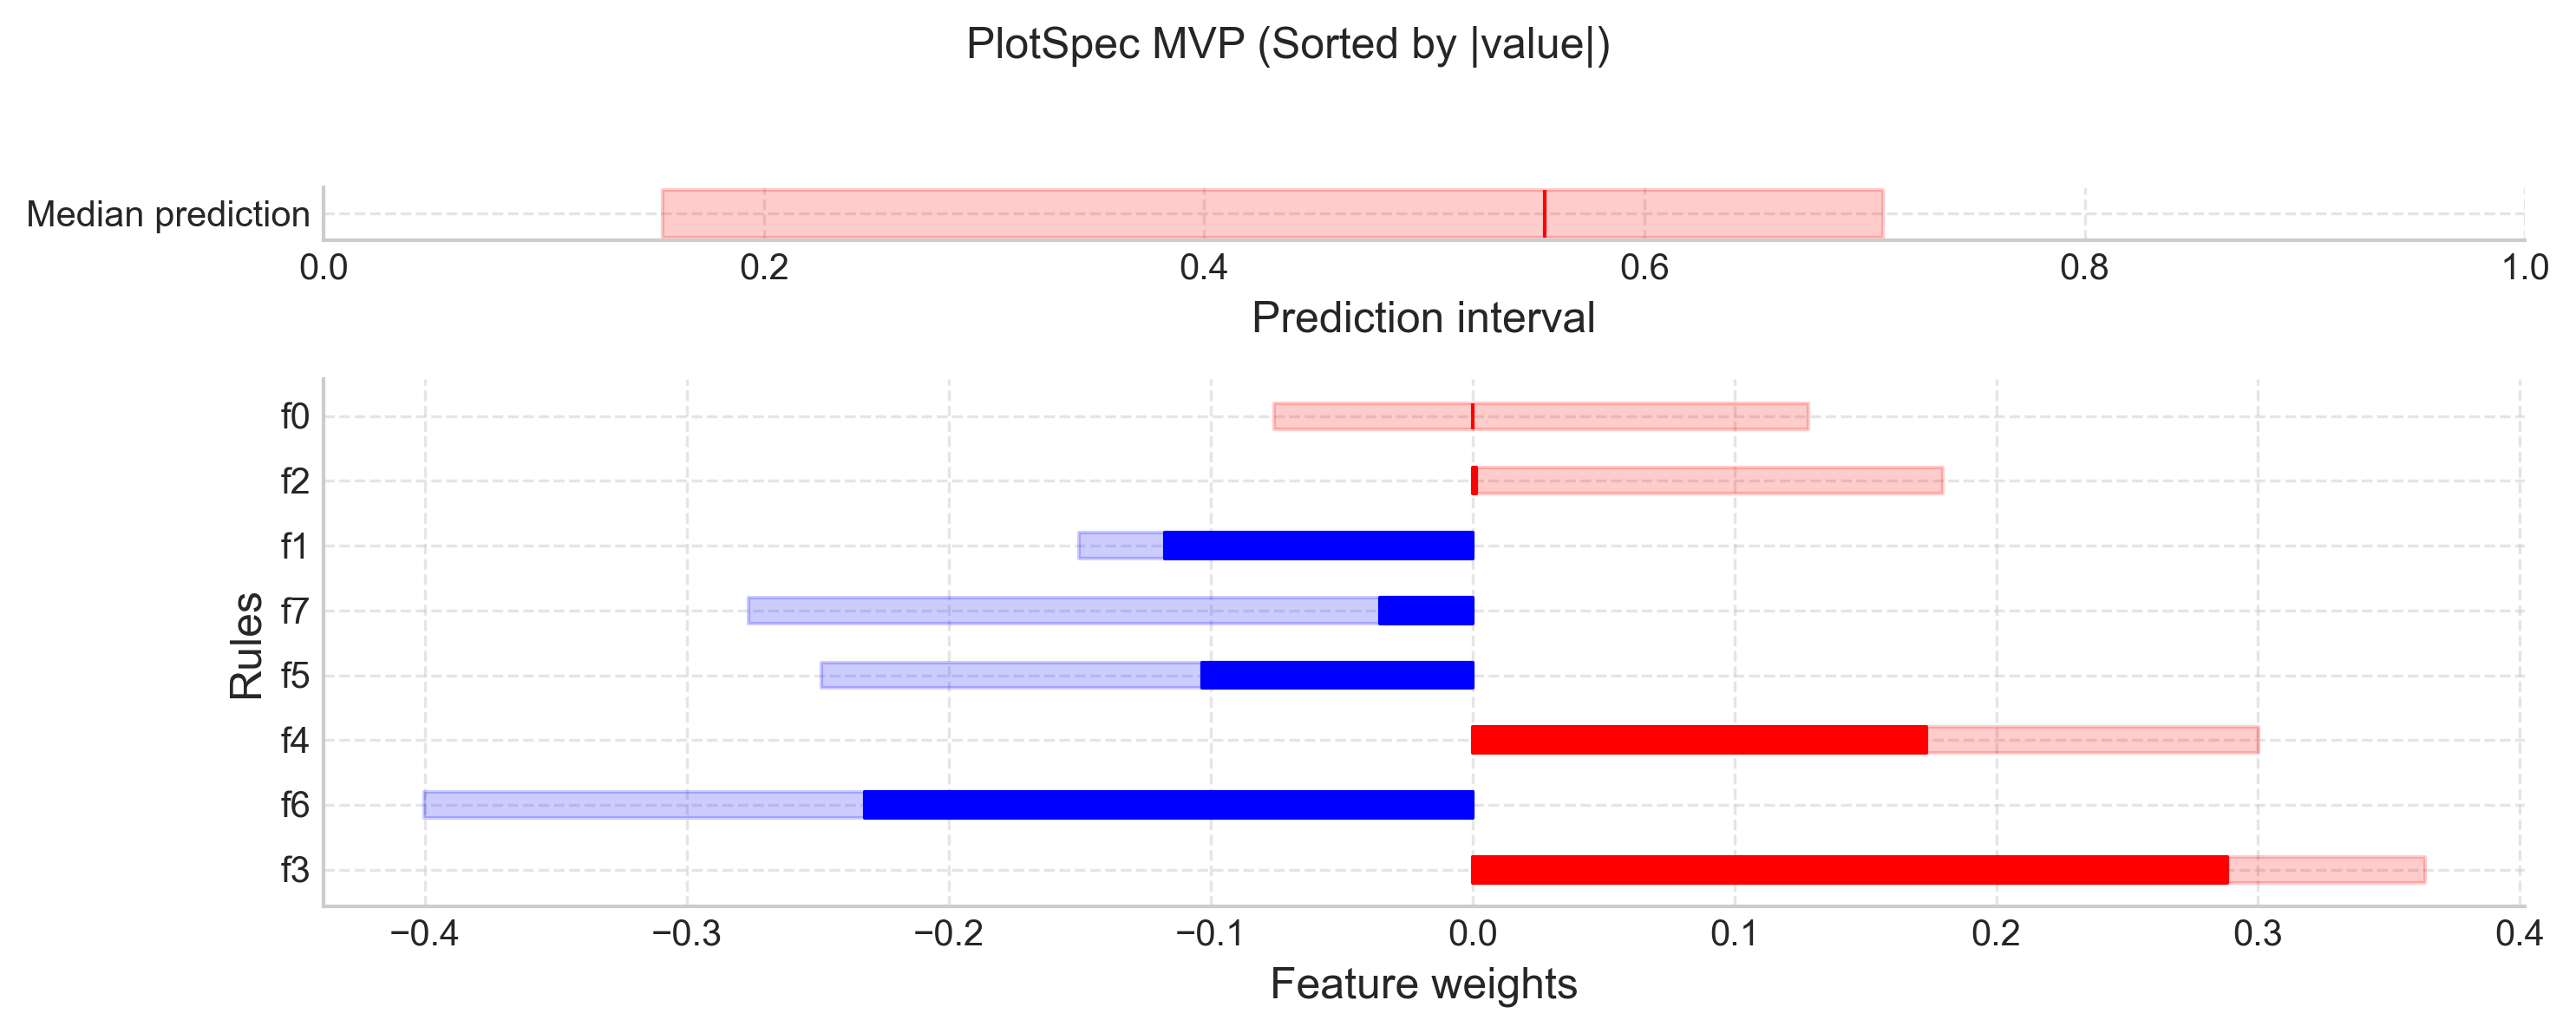

In [20]:
# Sort features by absolute contribution (descending) and render again
spec_sorted = build_regression_bars_spec(
    title='PlotSpec MVP (Sorted by |value|)',
    predict=predict,
    feature_weights=feature_weights,
    features_to_plot=features_to_plot,
    column_names=column_names,
    instance=instance,
    y_minmax=y_minmax,
    interval=interval,
    sort_by='abs',
    ascending=False,
)
matplotlib_adapter.render(spec_sorted, show=True)

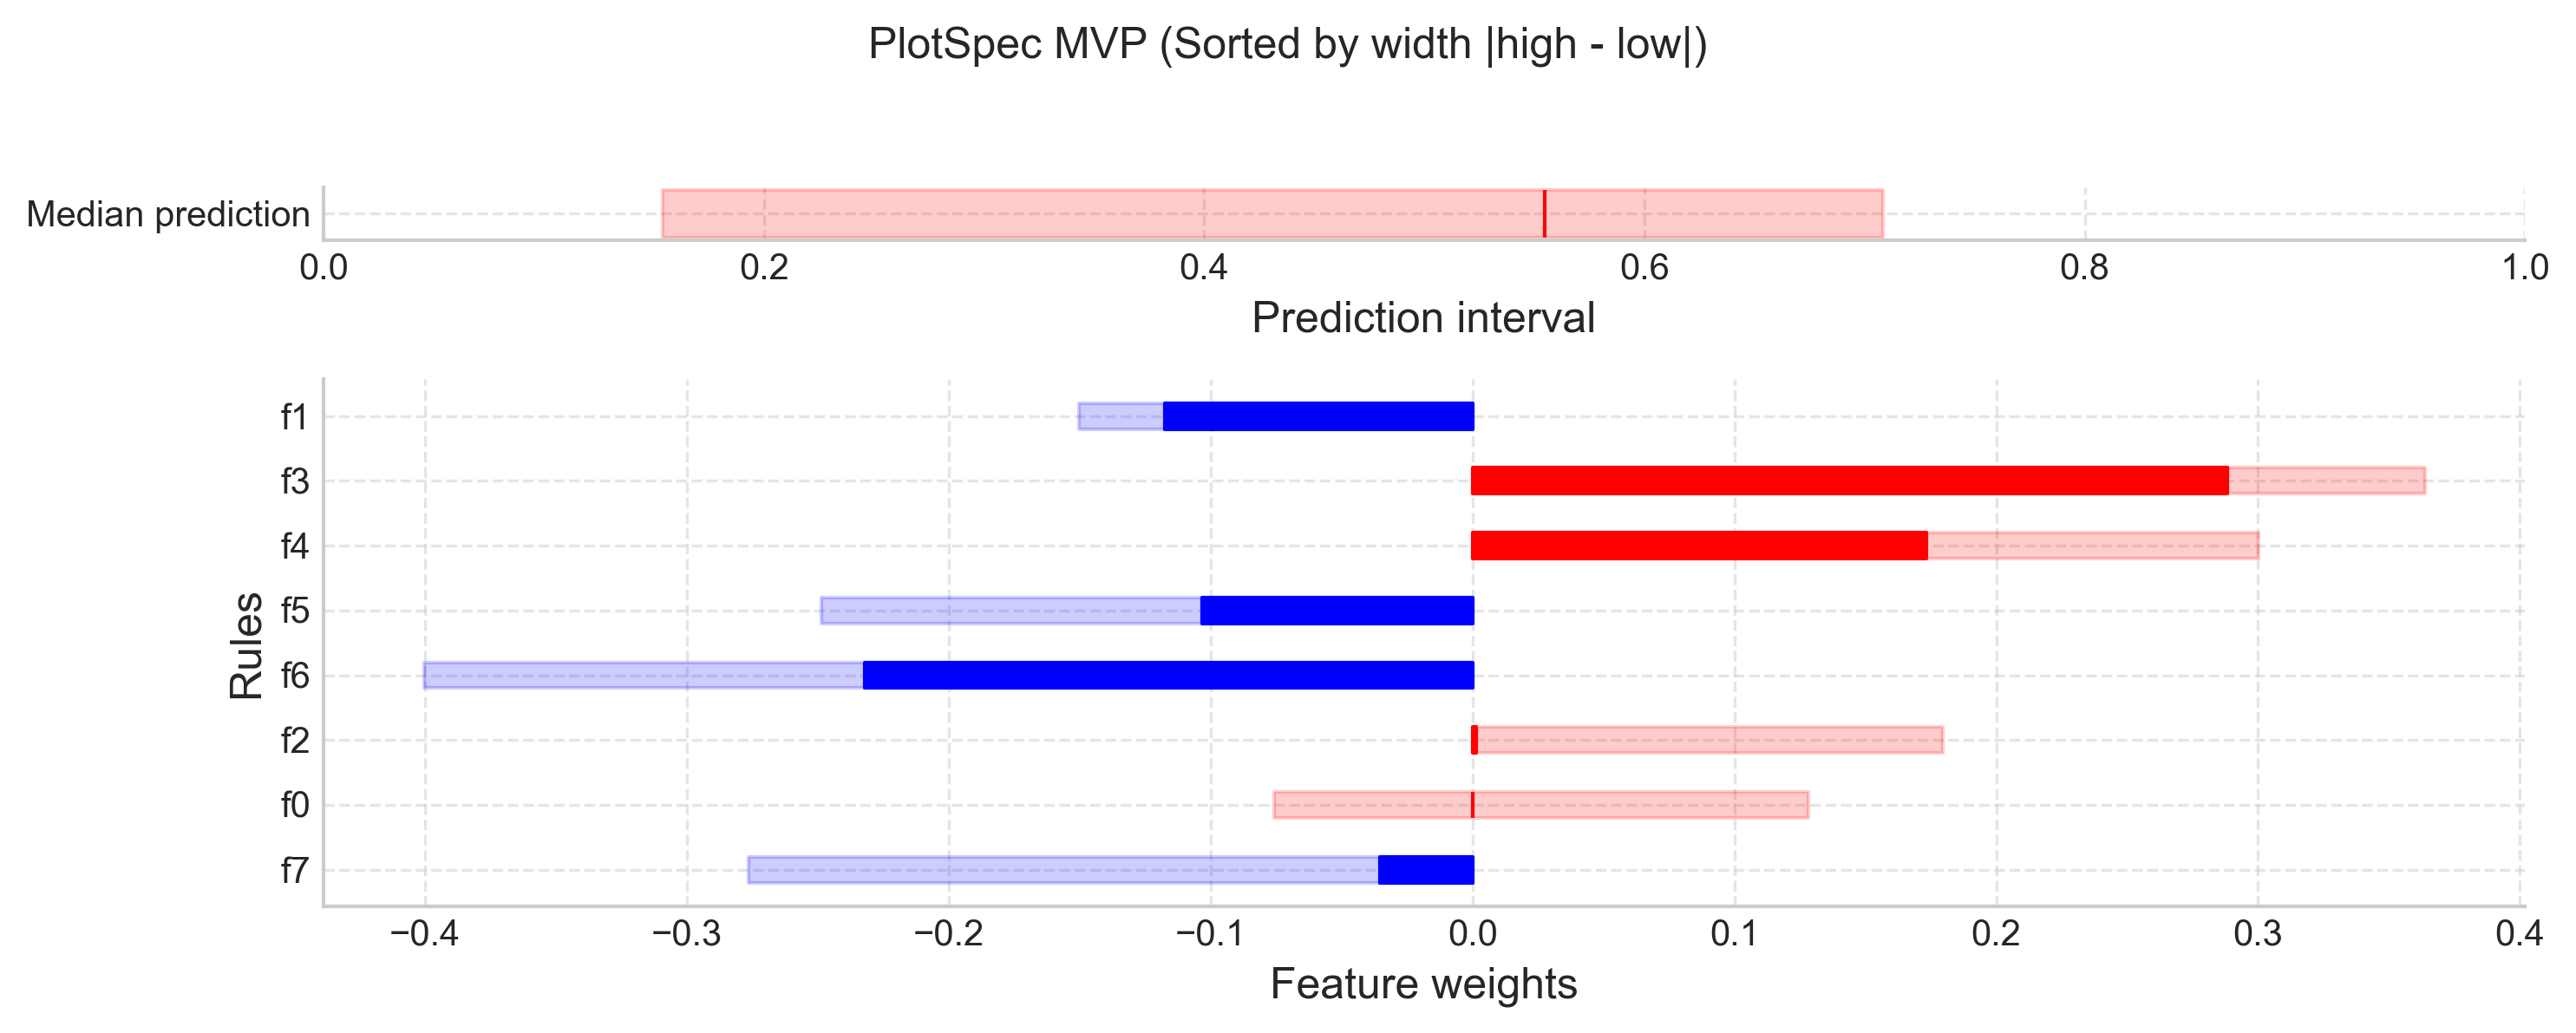

In [23]:
# Sort by interval width (|high - low|) descending
spec_width = build_regression_bars_spec(
    title='PlotSpec MVP (Sorted by width |high - low|)',
    predict=predict,
    feature_weights=feature_weights,
    features_to_plot=features_to_plot,
    column_names=column_names,
    instance=instance,
    y_minmax=y_minmax,
    interval=interval,
    sort_by='width',
    ascending=False,
)
matplotlib_adapter.render(spec_width, show=True)

# Note: sort_by='abs' orders by distance from zero (|value - 0|)